In [305]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [306]:
#loading data

df = pd.read_csv('tn.movie_budgets.csv')

In [307]:
#dataset exploration
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [308]:
df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data information shows that there are no missing values.

In [310]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    df[x] = df[x].astype(str).replace({'\$':'',',':''},regex = True)
    df[x] = df[x].astype(float)
    df[x] = df[x].round(0).astype(int)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [311]:
#check for duplicates

df.duplicated().sum()

0

There are no duplicated entries

In [312]:
#dropping rows where gross revenue is 0

df = df[df['worldwide_gross'] != 0]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


###DROP OUTLIERS OR NO

In [313]:
#calculating the profit made by each movie
df['profit'] = (df['worldwide_gross'] - df['production_budget']).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


In [314]:
#calculating the return of investment for each movie
df['r_o_i'] = (((df['profit'])/df['production_budget'])*100).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648,405
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315
...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-73


In [315]:
#checking for outliers based on the r_o_i

Q1 = df['r_o_i'].quantile(0.25)  
Q3 = df['r_o_i'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = df[(df['r_o_i'] < lower_bound) | (df['r_o_i'] > upper_bound)]
outliers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
42,43,"Dec 19, 1997",Titanic,200000000,659363944,-2147483648,1947483648,973
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,973
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,115000000,474544677,1027044677,912044677,793
413,14,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,826
424,25,"May 30, 2003",Finding Nemo,94000000,380529370,936429370,842429370,896
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,29070
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,11927
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908


In [316]:
# dropping outliers because they represent one off situations where a movie did really well or very poorly
df = df[(df['r_o_i'] >= lower_bound) & (df['r_o_i'] <= upper_bound)]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648,405
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315
...,...,...,...,...,...,...,...,...
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401,-9599,-95
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-49
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87


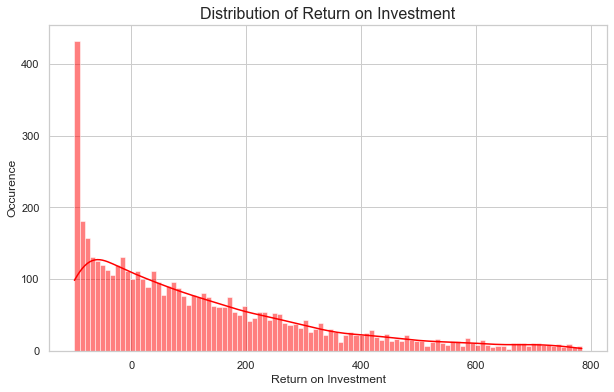

In [317]:
#checking the distribution of values using a kde plot

plt.figure(figsize = (10, 6))
sns.histplot(data=df, x='r_o_i', bins = 100, color = 'red', kde = True)
plt.title('Distribution of Return on Investment', fontsize=16)
plt.xlabel('Return on Investment', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

From the above distribution, it is clear that the return on investment is skewed to the right, indicating that a significant amount of movies end up with low r_o_i.

In [318]:
#using median to check for central tendency rather than mean due to the skew;
median = np.mean(df['r_o_i'])
median

120.49371706526145

The median return on investment (ROI) is 101.5%, which is a positive indicator, suggesting that the majority of movies in the industry achieve at least a 100% return on their investment. Are there any notable trends that contribute to achieving high ROI? For instance, are there specific movie seasons when the industry performs exceptionally well? Additionally, what is the correlation between ROI and the release months?

In [319]:
correlation = df['r_o_i'].corr(df['month'])

print(f"The correlation between ROI and month is: {correlation}")


KeyError: 'month'

This shows almost no correlation between month and return on investment

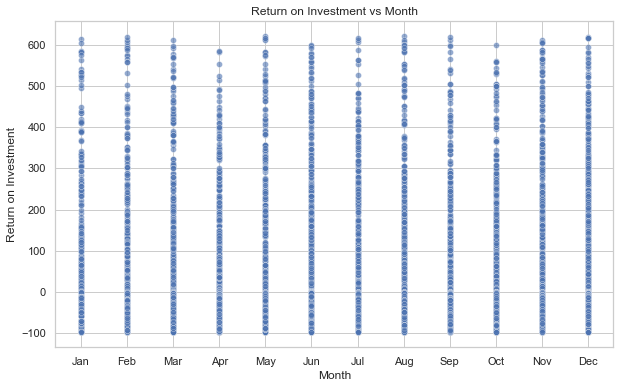

In [277]:
# visualisation of the correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['month'], y=df['r_o_i'], alpha=0.6, color="b")

# Title and labels
plt.title("Return on Investment vs Month")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Return on Investment")

plt.show()

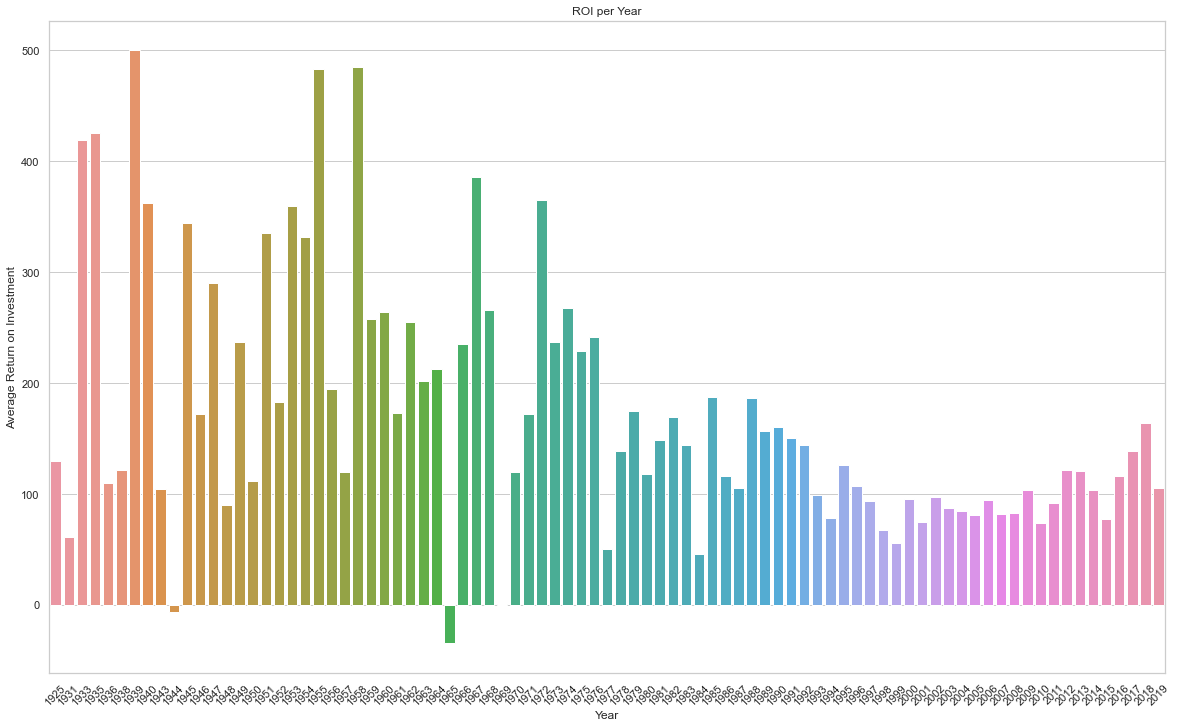

In [285]:
roi_per_year = df.groupby('year')['r_o_i'].mean().reset_index()

plt.figure(figsize=(20, 12))

# Bar plot
sns.barplot(x=roi_per_year['year'], y=roi_per_year['r_o_i'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Average Return on Investment")
plt.title("ROI per Year")
plt.xticks(rotation=45)


# Show the plot
plt.show()

In [323]:
#sorting data from the highest return on investment
df = df.sort_values(by='profit', ascending=False)
df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648,405
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,699
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,574
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,574
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,668
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,748
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,686


In [324]:
#changing the date column to datetime

df['release_date'] = pd.to_datetime(df['release_date']) 

#extracting the year into its own column
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i,year,month
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582,2018,4
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571,2015,12
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,405,2009,12
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,666,2015,6
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,699,2015,4
...,...,...,...,...,...,...,...,...,...,...
404,5,2002-08-16,The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,-92,2002,8
352,53,2001-04-27,Town & Country,105000000,6712451,10364769,-94635231,-90,2001,4
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,-106900000,-97,2019,6
193,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,-110450242,-73,2011,3


In [326]:
#how has the movie industry been doing over the years using a function

def plot_timeseries(col_name):
    time_series = df.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=time_series, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

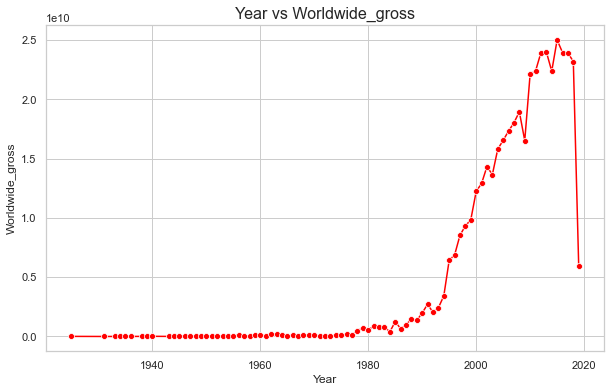

In [327]:
#time series based on worldwide_gross
plot_timeseries('worldwide_gross')

From the above visualisation, we can see that the movie industry peaked worldwide from the 1990s, and a sudden drop in around 2018-2020

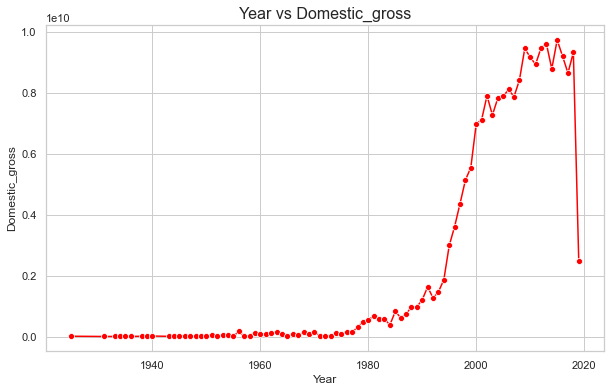

In [328]:
#time series based on domestic_gross
plot_timeseries('domestic_gross')

We observe a similar trend in the domestic market as to the worldwide market.

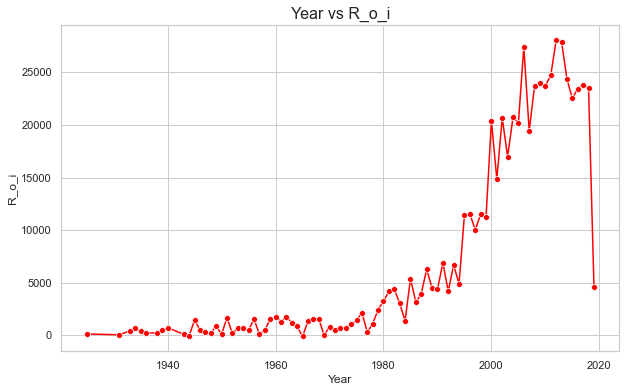

In [329]:
#time series based on r_o_i
plot_timeseries('r_o_i')

From the time series using return on investment, we can observe a sudden peak around the 1970, and a gradual increasing trend from 1990s to later in the decade 2010-2020.

From the above plots, is it safe to say that the way the domestic market behaves mirrors how the worldwide market will behave? Using a simple linear regression to see the relationship between the domestic gross and the worlwide gross:

In [249]:
#defining variables

X = df[['domestic_gross']]
y = df['worldwide_gross']

In [250]:
#adding constant

model = sm.OLS(endog = y, exog = sm.add_constant(X))

In [251]:
#fitting

results = model.fit()

In [252]:
#evaluation of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:09:35   Log-Likelihood:                -96693.
No. Observations:                4934   AIC:                         1.934e+05
Df Residuals:                    4932   BIC:                         1.934e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.816e+06   1.32e+06     -3.

Interpretation of the simple regression:
1. R-squared = 0.772 meaning that the variance of the worldwide gross can be explained by the domestic gross 77% of the time.
2. p-value = 0.00 which is less than 0.05 meaning that the model is statistically significant. Domestic gross can significantly predict worldwide gross
3. constant = 4.592e+06 means When domestic gross is 0, estimated value of the worldwide gross is $4,592,000
4. coef = 1.6641 suggests that for every unit increase in the domestic gross, worldwide gross increases by 1.6641 units.

From the above, we can note that higher domestic gross is associated with higher worldwide gross.

Can we attribute the remaining 23% of the variance of the worldwide gross to either budgets or the year they were released? Using a multiple linear regression:

In [253]:
#defining variables

X1 = df[['domestic_gross','production_budget','year']]
y1 = df['worldwide_gross']

In [254]:
#adding constant

model = sm.OLS(endog = y1, exog = sm.add_constant(X1))

In [255]:
#fitting

results1 = model.fit()

In [256]:
#evaluation of the results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     6783.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:09:35   Log-Likelihood:                -96431.
No. Observations:                4934   AIC:                         1.929e+05
Df Residuals:                    4930   BIC:                         1.929e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.248e+09   1.91e+0

Interpretation of the above:
1. R-squared = 0.816 meaning that the variance of the worldwide gross can be explained by the domestic gross,production budget and the year the movie was released 81.6% of the time.
2. p-value = 0.00 which is less than 0.05 meaning that the model is statistically significant. Atleast one can significantly predict worldwide gross
3. constant = -6.533e+0 means when all predictors are 0, estimated value of the worldwide gross is negative.
4. domestic gross coef = 1.4688 suggests that for every unit increase in the domestic gross, worldwide gross increases by 1.4688 units holding others constant.
5. production budget coef = 0.4817 meaning that for every unit increase in the production budget, worldwide gross increases by 0.4817 units holding others constant.
6. year coef = 3.25e+05 meaning that for every unit increase in the year, worldwide gross increases by $325,200  holding others constant.

From the above, we can note that higher domestic gross is the most important factor to predict worlwide gross.
The effect of year is smaller compared to domestic gross and production budget. This indicates that movies made in more recent years tend to earn slightly more, possibly due to inflation or increased global demand.
****** HOW MUCH CAN HE INVEST TO GET ATLEAST RETURN ON INVESTMENT AND IN WHAT

Are there any specific months where the industry performs well?


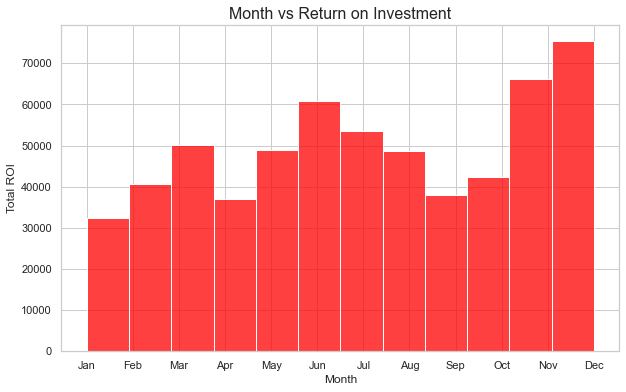

In [325]:
plt.figure(figsize=(10, 6))

# Histogram plot with weighted ROI
sns.histplot(data=df, x='month', weights='r_o_i', bins=12, color='red')

# Set month labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Labels and title
plt.title('Month vs Return on Investment', fontsize=16)  # Updated title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total ROI', fontsize=12)

# Show grid
plt.grid(True)

plt.show()


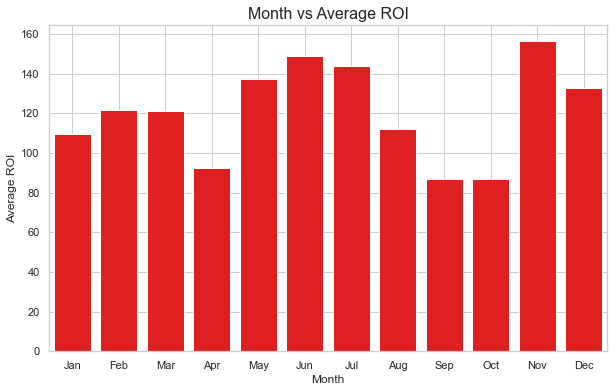

In [330]:
roi_per_month = df.groupby('month')['r_o_i'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_per_month['month'], y=roi_per_month['r_o_i'], color='red')

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Month vs Average ROI', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.grid(True)
plt.show()
